In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from astropy.timeseries import LombScargle as LS
import astropy.units as u
from utils_periodogram_analysis import sig_pg_peaks
from utils_data_prep import prep_lightcurves

## Create Lightcurve

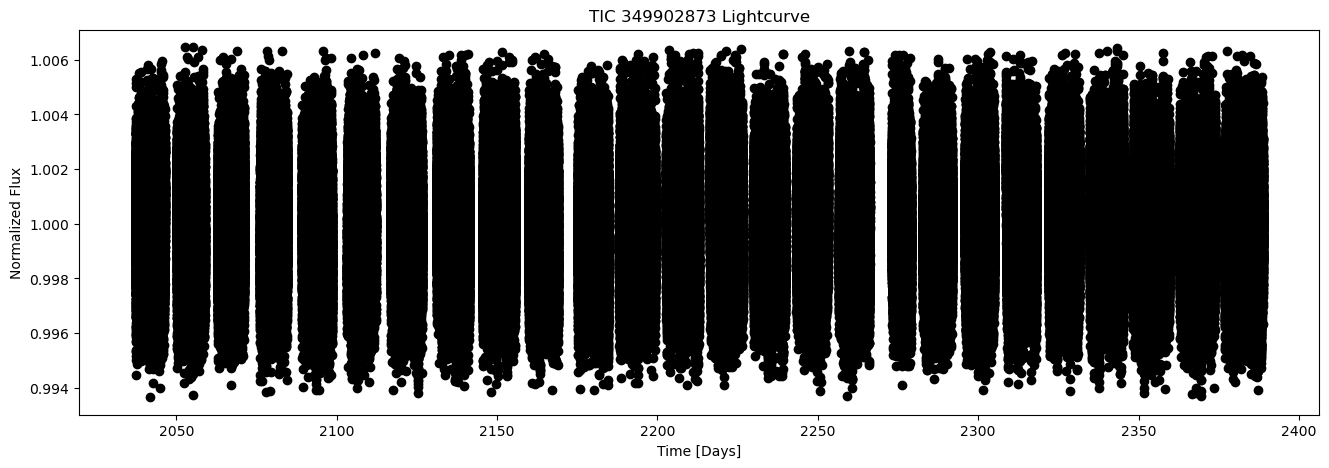

In [2]:
# set target names
target = '349902873'

# set sectors to stitch
sectors = np.arange(27,40,1)

# set "crop factor"
# amount of time for function to cut off of discontinuities
# units are in days. 1 day is a safe choice in general
crop = 1

# prep data
lc = prep_lightcurves(target, sectors, crop)
    
# plot stitched lightcurve
plt.figure(figsize=(16,5))
plt.plot(lc.time.value, lc.flux.value, 'o', color='k')
plt.title(f'TIC {target} Lightcurve')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [Days]')
plt.show()

## Calculate Frequency and Periods of Modes for each Lightcurve

In [3]:
# set lightcurve
lightcurve = lc

# max periodogram frequency
max_frequency = 30

# set false alarm level as a percentage
# 1 would add no points, 0 would add all
# 0.00001 means that there's only a 0.001% chance any included points are not real 
probability = 0.00001

# set window size to move through periodogram
window_size = 0.5

# analyze lightcurve, this can take awhile
# function will give you updates as it analyzes
# function returns a 3D array where 
# [0] is the power, [1] the frequency, [2] the period, [3] delta_f, [4] delta_p
results = sig_pg_peaks(lc, max_frequency, probability, window_size)

#------------------------------------------------------------------------------------------

# define results into individual variables
sig_pwr = results[0]
sig_f = results[1]
sig_p = results[2]
delta_f = results[3]
delta_p = results[4]

Starting Periodogram Analysis
Periodogram Analysis Finished


## Plot Full Size Periodogram and Frequuence/Period Spacing

In [5]:
# calculate full periodogram
# define time flux, and error arrays
t = lightcurve.time.value
f = lightcurve.flux.value
f_err = lightcurve.flux_err.value

# use astropy Lomb Scargle periodogram up to max frequency
ls = LS(t, f, f_err)
frequency, power = ls.autopower(method='fast', maximum_frequency = max_frequency)

#---------------------------------------------------------------------------------

# misc variables for plot
# defines length of results array for plotting  
end = int(len(sig_f))

# significance line
min_pwr = ls.false_alarm_level(probability, method='baluev')

Text(0, 0.5, 'Period Spacing (Log Scaled)')

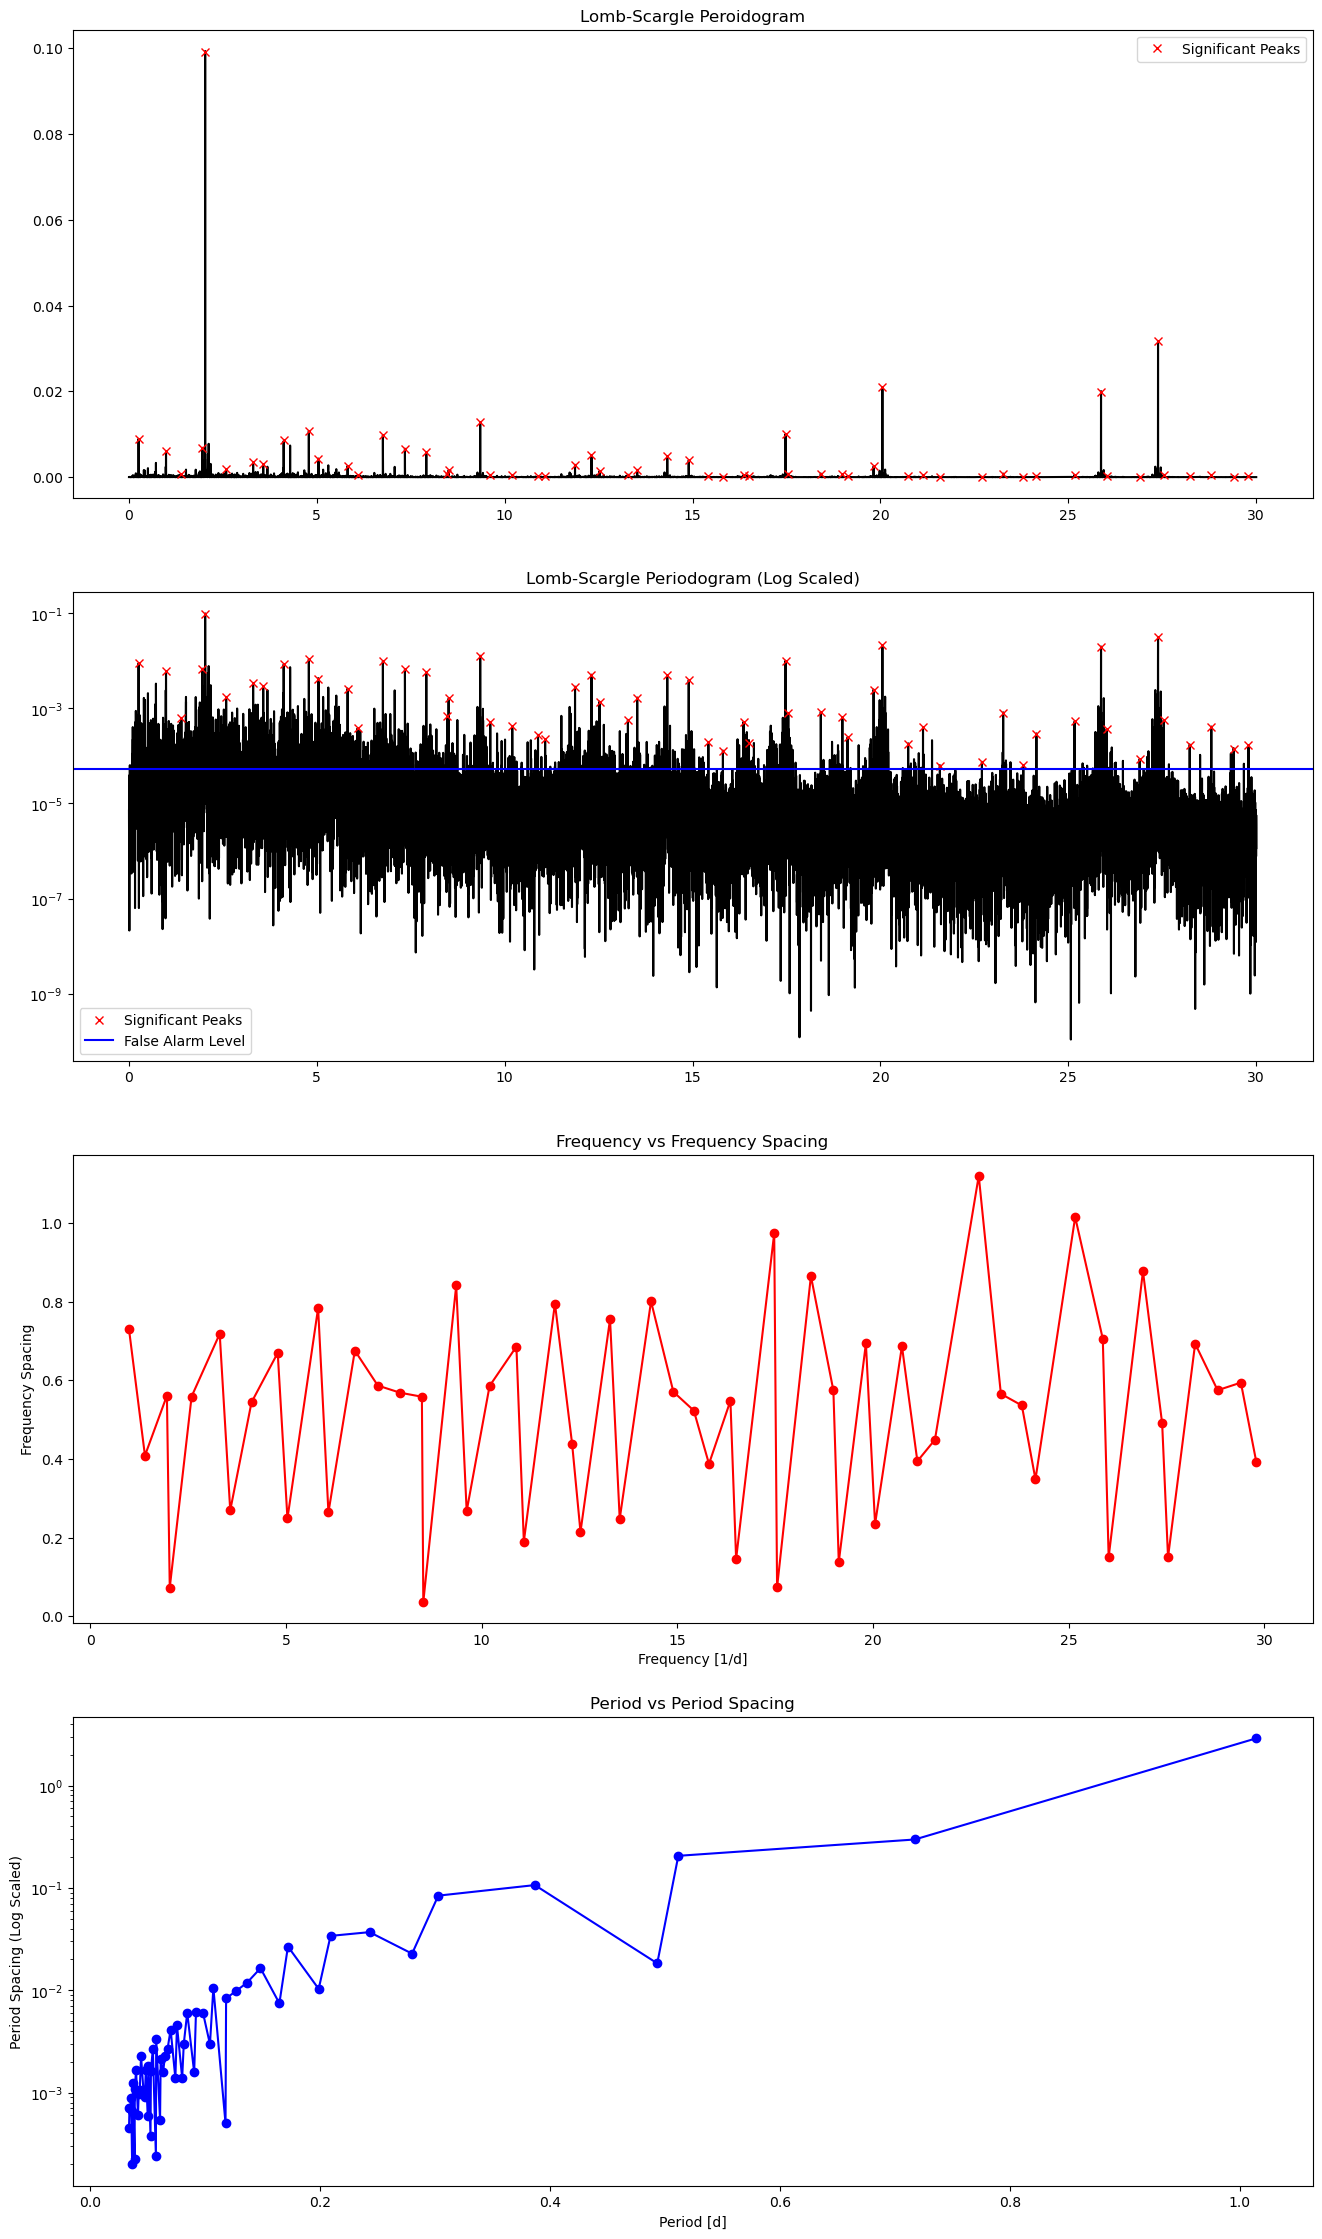

In [6]:
fig, axs = plt.subplots(4,1, figsize=(16,28))
axs[0].plot(frequency, power, color='k')
axs[0].plot(sig_f, sig_pwr, 'x', color='r', label = 'Significant Peaks')
axs[0].set_title('Lomb-Scargle Peroidogram')
axs[0].legend()

axs[1].plot(frequency, power, color='k')
axs[1].plot(sig_f, sig_pwr, 'x', color='r', label = 'Significant Peaks')
axs[1].axhline(y=min_pwr, color = 'b', label = 'False Alarm Level')
axs[1].set_title('Lomb-Scargle Periodogram (Log Scaled)')
axs[1].set_yscale('log')
axs[1].legend()

# plot frequency vs change in frequency
axs[2].plot(sig_f[1:end], delta_f, marker='o', color='red')
# axs[2].axhline(y=0.25, color = 'g')
# axs[2].axhline(y=0.75, color = 'g')
#axs[2].set_ylim(0,0.5)
axs[2].set_title('Frequency vs Frequency Spacing')
axs[2].set_xlabel('Frequency [1/d]')
axs[2].set_ylabel('Frequency Spacing')

# plot period vs change in period
axs[3].plot(sig_p[1:end], delta_p, marker='o', color='b')
axs[3].set_title('Period vs Period Spacing')
axs[3].set_yscale('log')
axs[3].set_xlabel('Period [d]')
axs[3].set_ylabel('Period Spacing (Log Scaled)')